## 9.2. K-means_Odev

1. Bu ödevin amacı, iris veri kümesine k-ortalama uygulamak ve k değerini değiştirdiğinde ne olacağını görmektir. Varsa, hangi çözümü en iyi olarak görüyorsunuz? Karmaşıklık bu veri kümesinde bir sorun olmaya başlıyor mu? Bulgularınızı mentörle paylaşın. 3'ten fazla kümey içeren bir sonuç bulabileceğinizi aklınızdan çıkarmayın.Bu kümelerden ikisi tek bir çiçek türüyle eşleşirken, diğer ikisi örneğin diğer türlerle eşlenir.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
Y = iris.target

# standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

7.84 ms ± 69.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


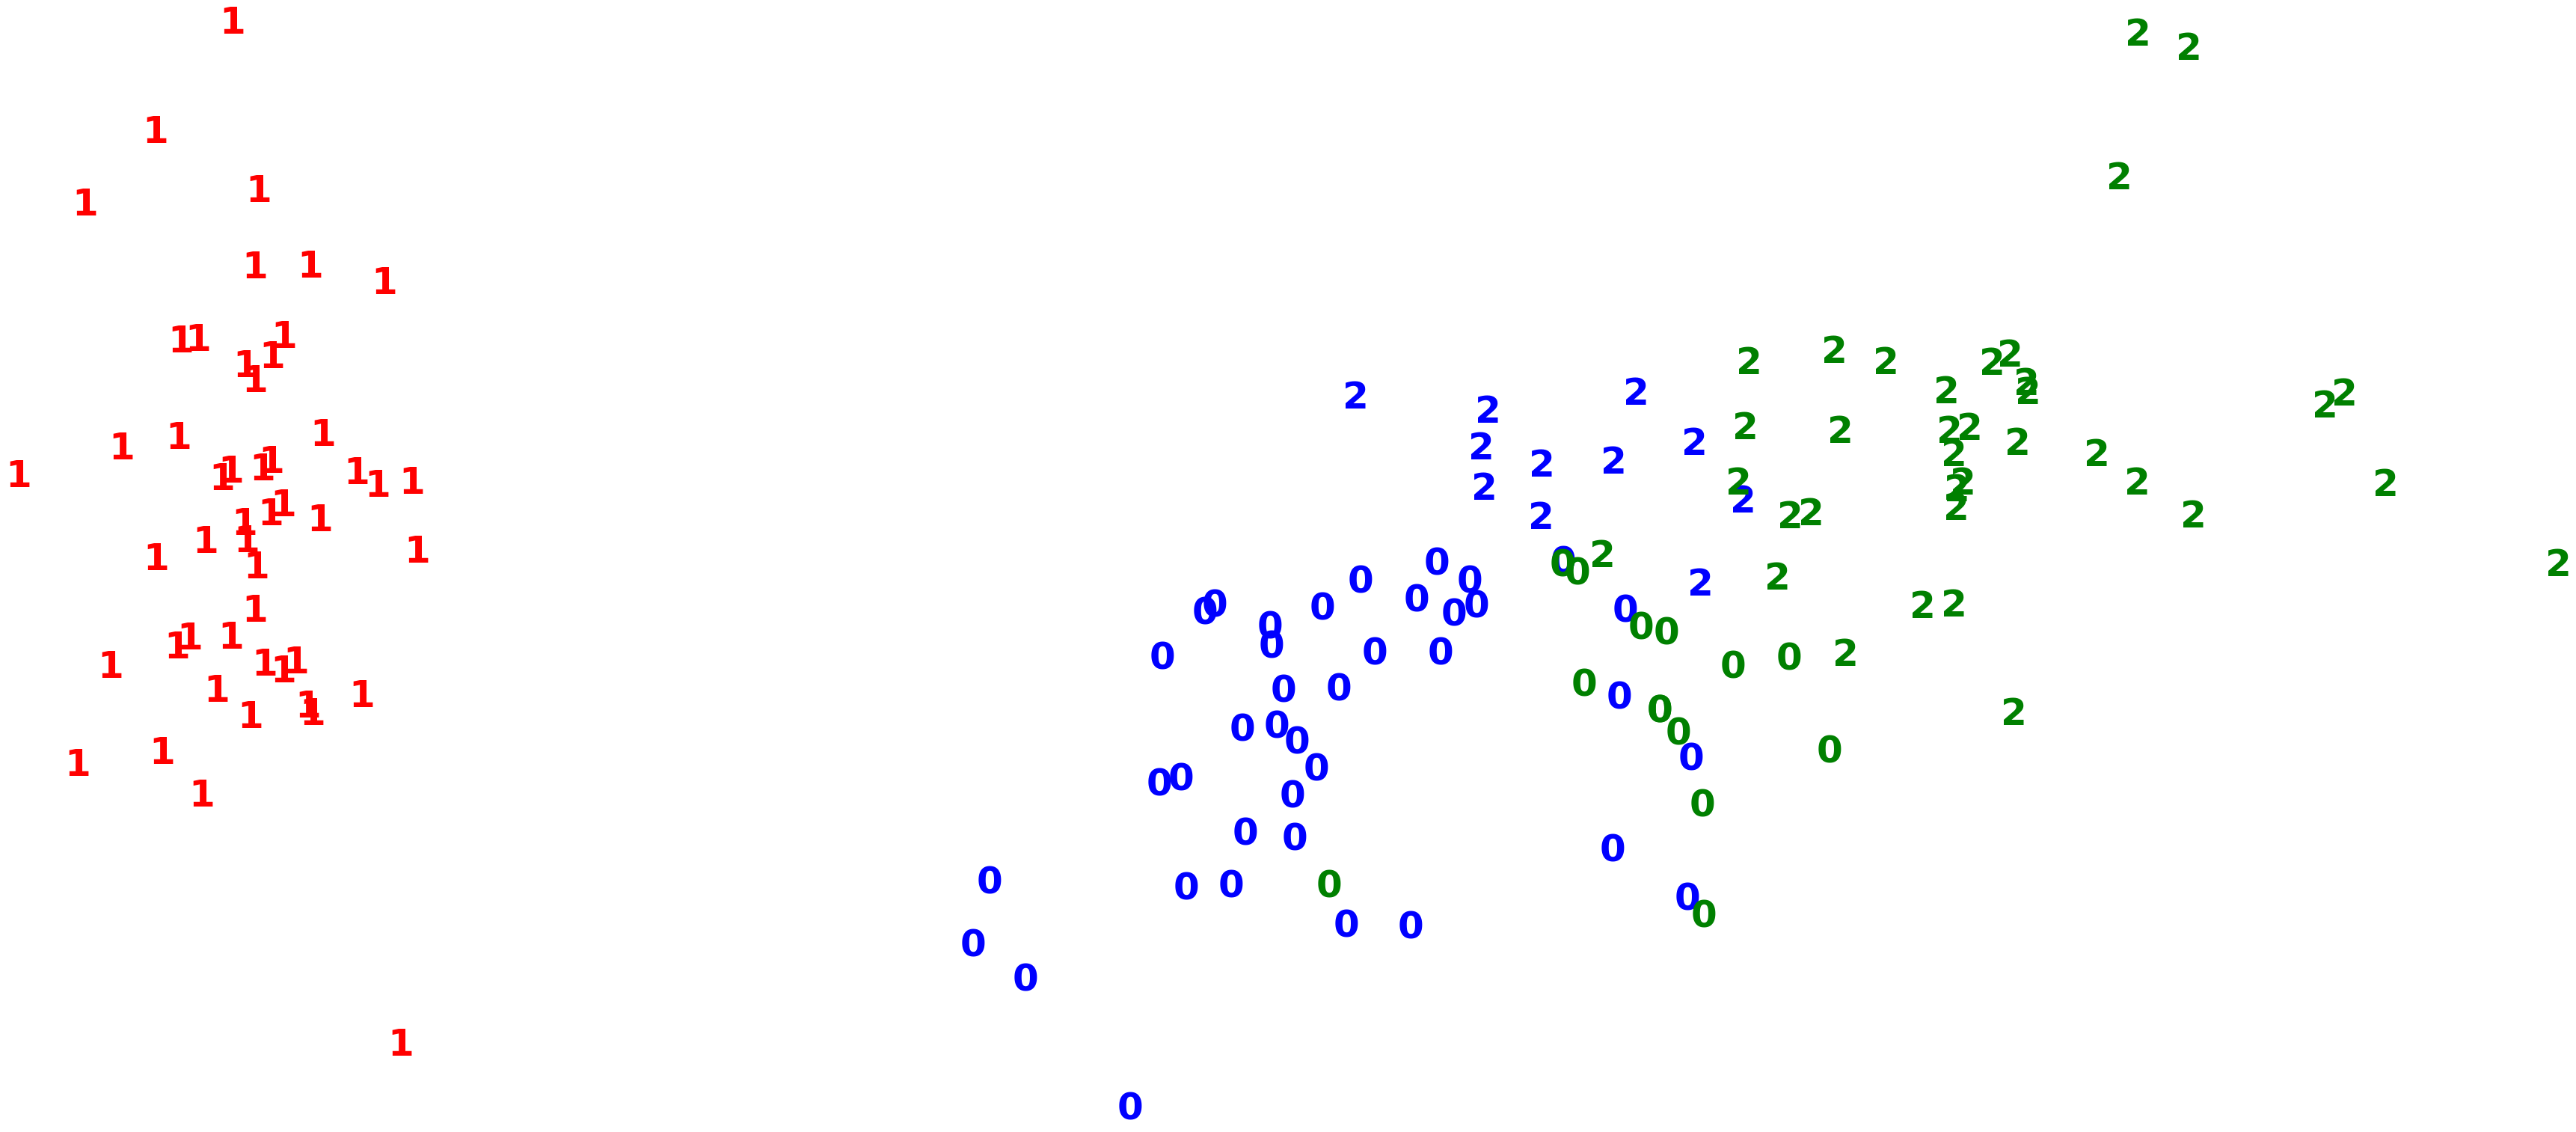

In [2]:
kmeans_kume3 = KMeans(n_clusters=3, random_state=123)

# fit model
%timeit kmeans_kume3.fit(X_std)
Y_pred = kmeans_kume3.predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(Y_pred[i]),
             color=colours[Y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

10.5 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


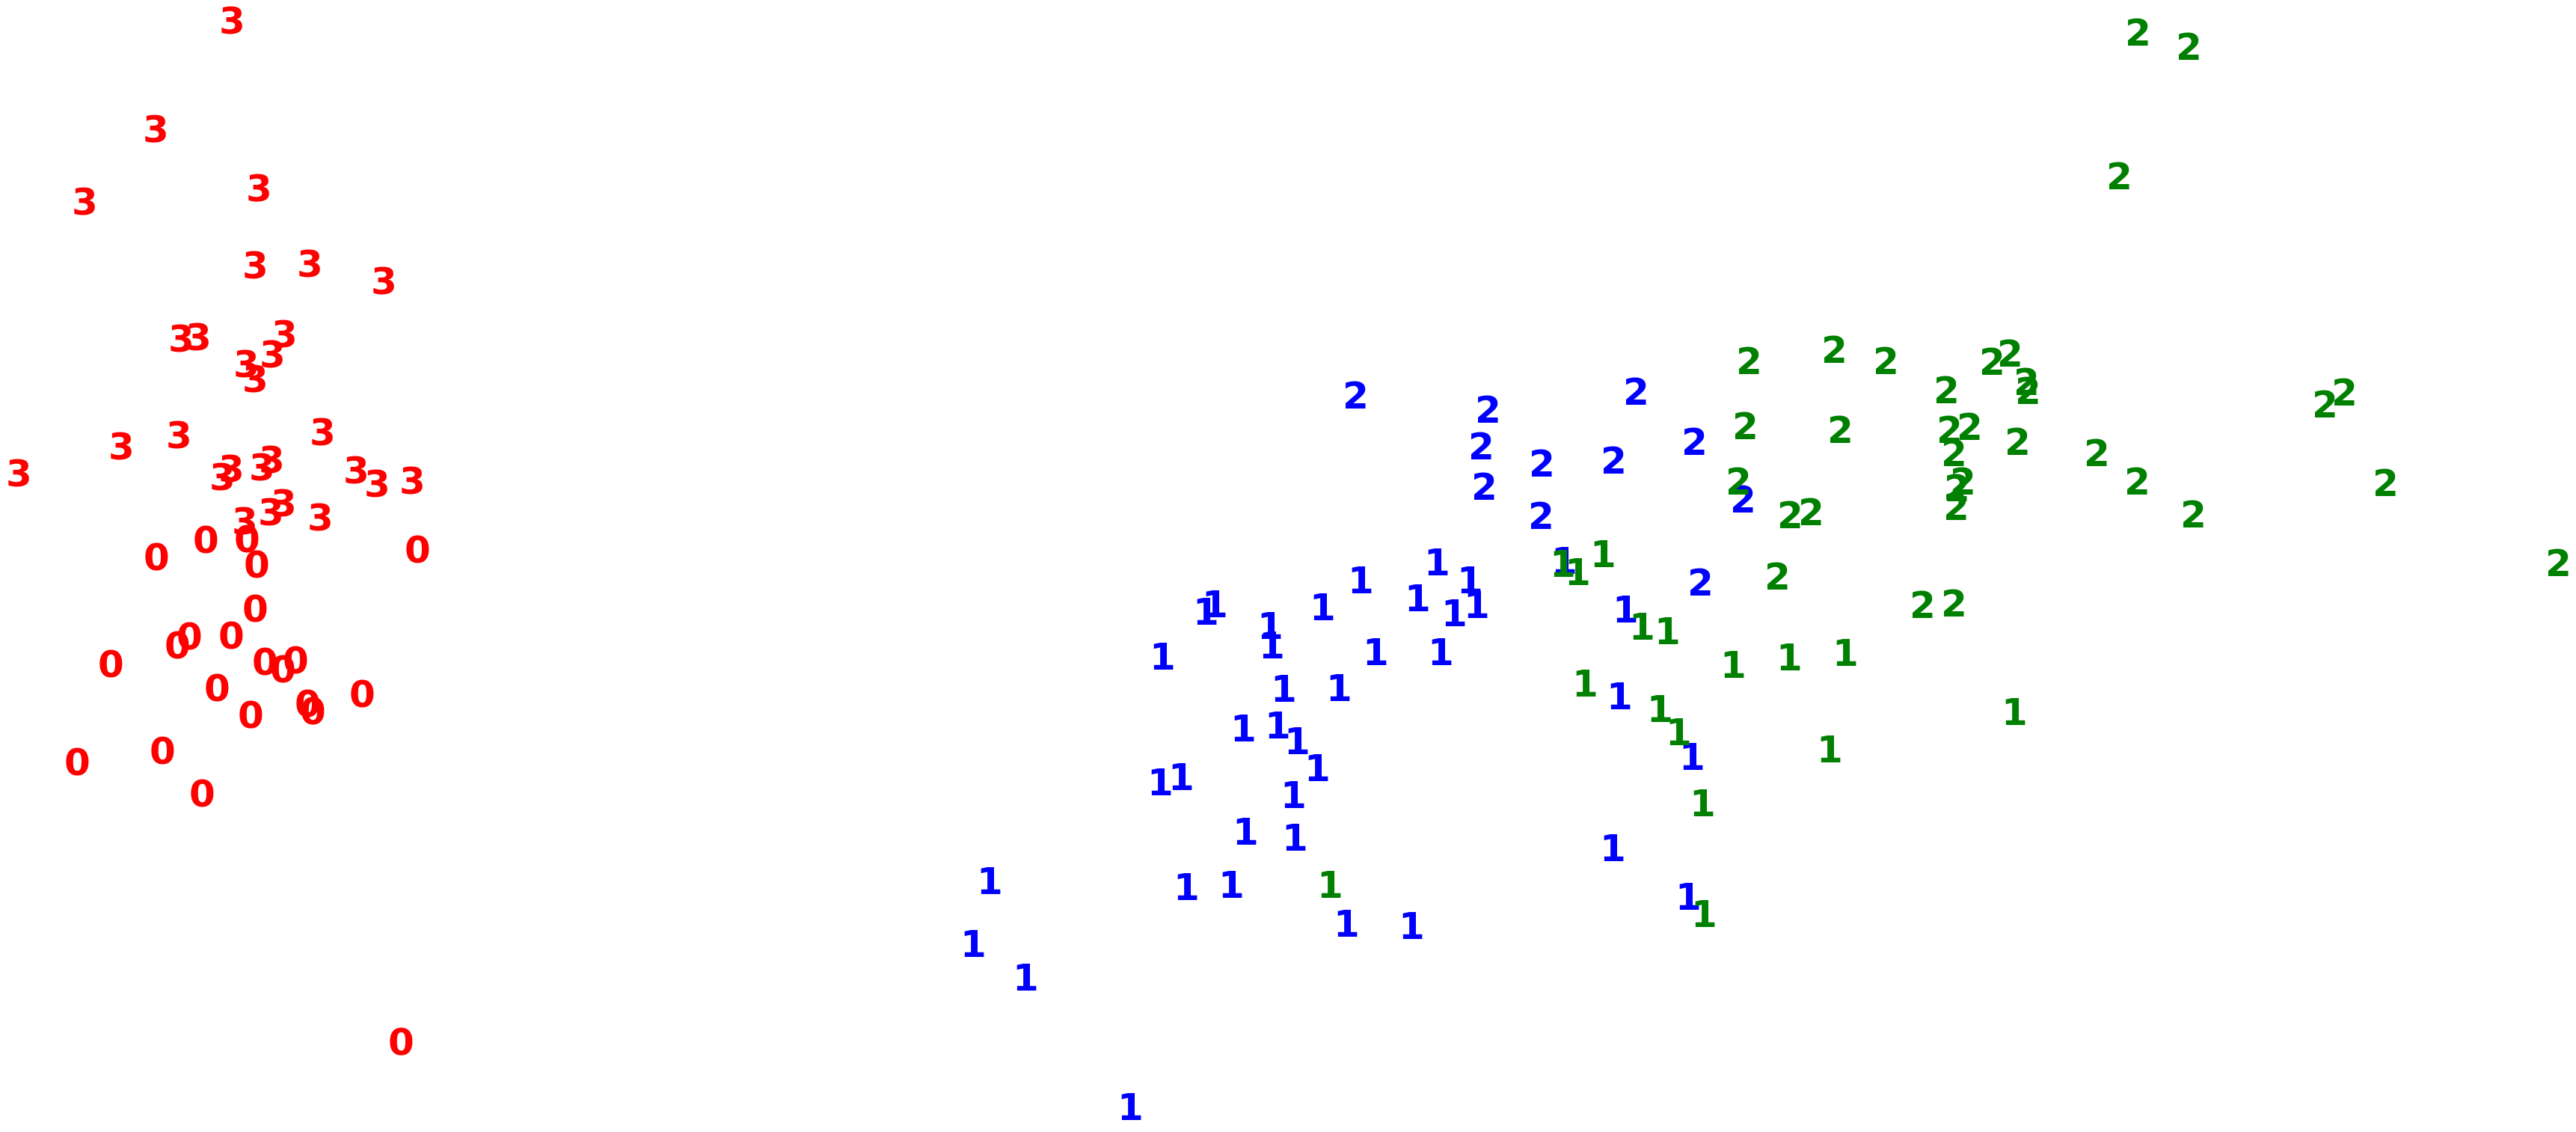

In [3]:
kmeans_kume4 = KMeans(n_clusters=4, random_state=123)

# fit model
%timeit kmeans_kume4.fit(X_std)
Y_pred = kmeans_kume4.predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(Y_pred[i]),
             color=colours[Y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

12.3 ms ± 35.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


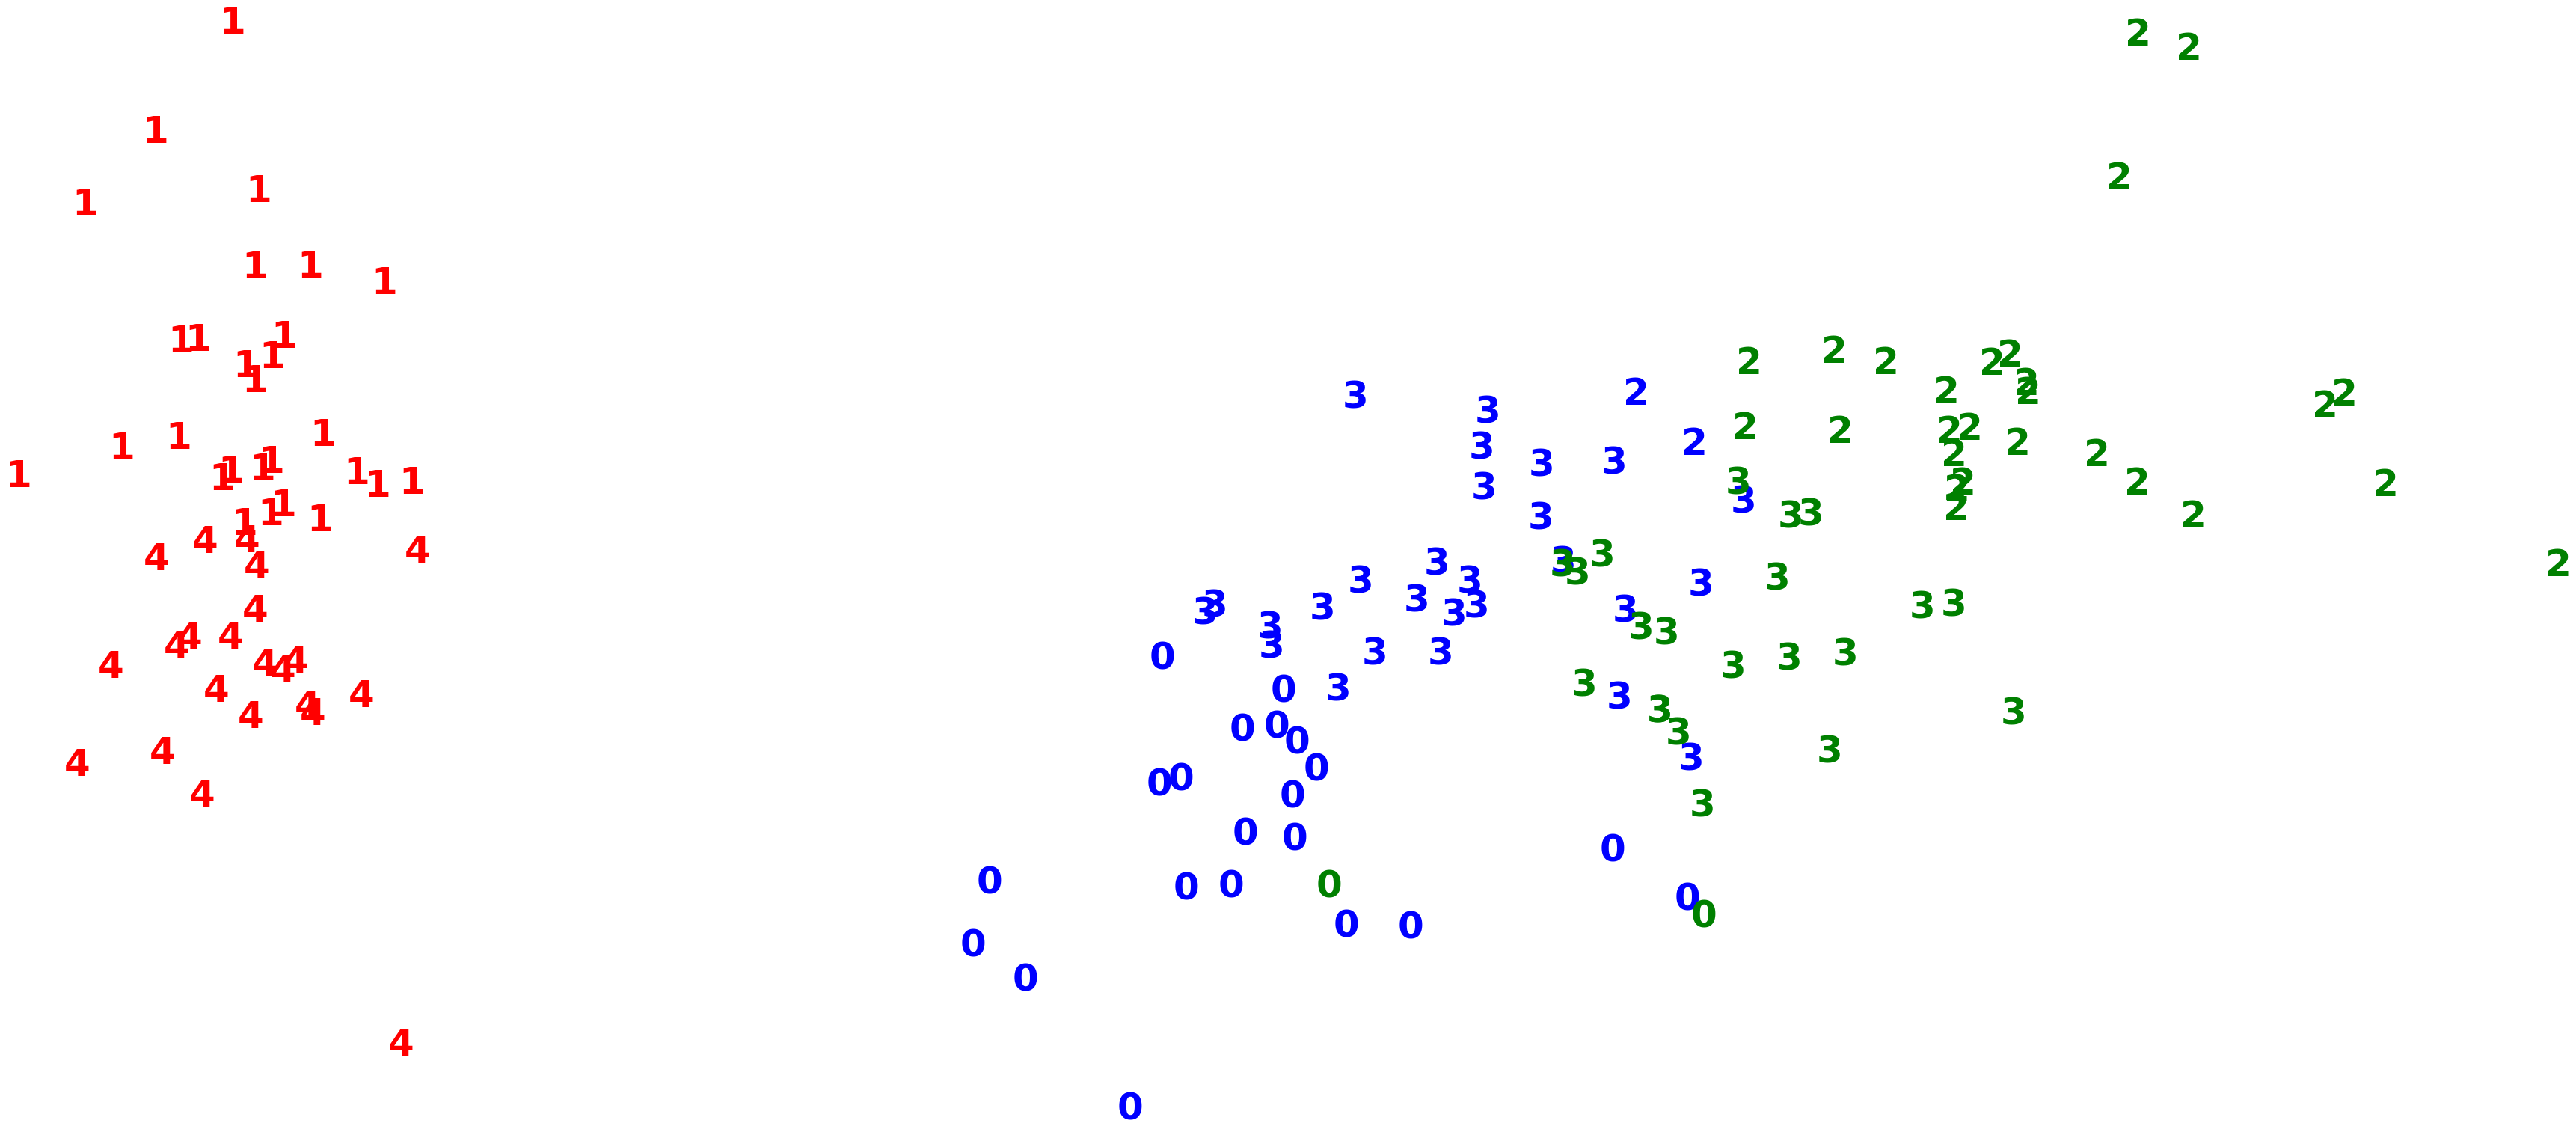

In [4]:
kmeans_kume5 = KMeans(n_clusters=5, random_state=123)

# fit model
%timeit kmeans_kume5.fit(X_std)
Y_pred = kmeans_kume5.predict(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(Y_pred[i]),
             color=colours[Y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

2. doğru şekilde atayan bir k-ortalama çözümü oluşturun. Bu durumda, aslında iki olan verideki doğru küme sayısını biliyoruz. Ancak burada, k-ortalamanın beklediğimiz şekilde gözlemleri atayıp atamadığını test edeceksiniz.

In [7]:
cleveland = pd.read_excel('cleveland.xlsx')
cleveland.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
168,64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,2.0,6.0,positive
169,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0,positive
170,61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0,positive
171,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,positive
172,70.0,1.0,4.0,145.0,174.0,0.0,0.0,125.0,1.0,2.6,3.0,0.0,7.0,positive


In [8]:
cleveland['num'] = cleveland.num.replace({'positive':1, 'negative':0})

In [11]:
X = cleveland.drop('num', axis=1)
Y = cleveland.num

In [12]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [13]:
kmeans_kume = KMeans(n_clusters=2, random_state=123)

# fit model
%timeit kmeans_kume.fit(X_std)
Y_pred = kmeans_kume.predict(X_std)

9.73 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


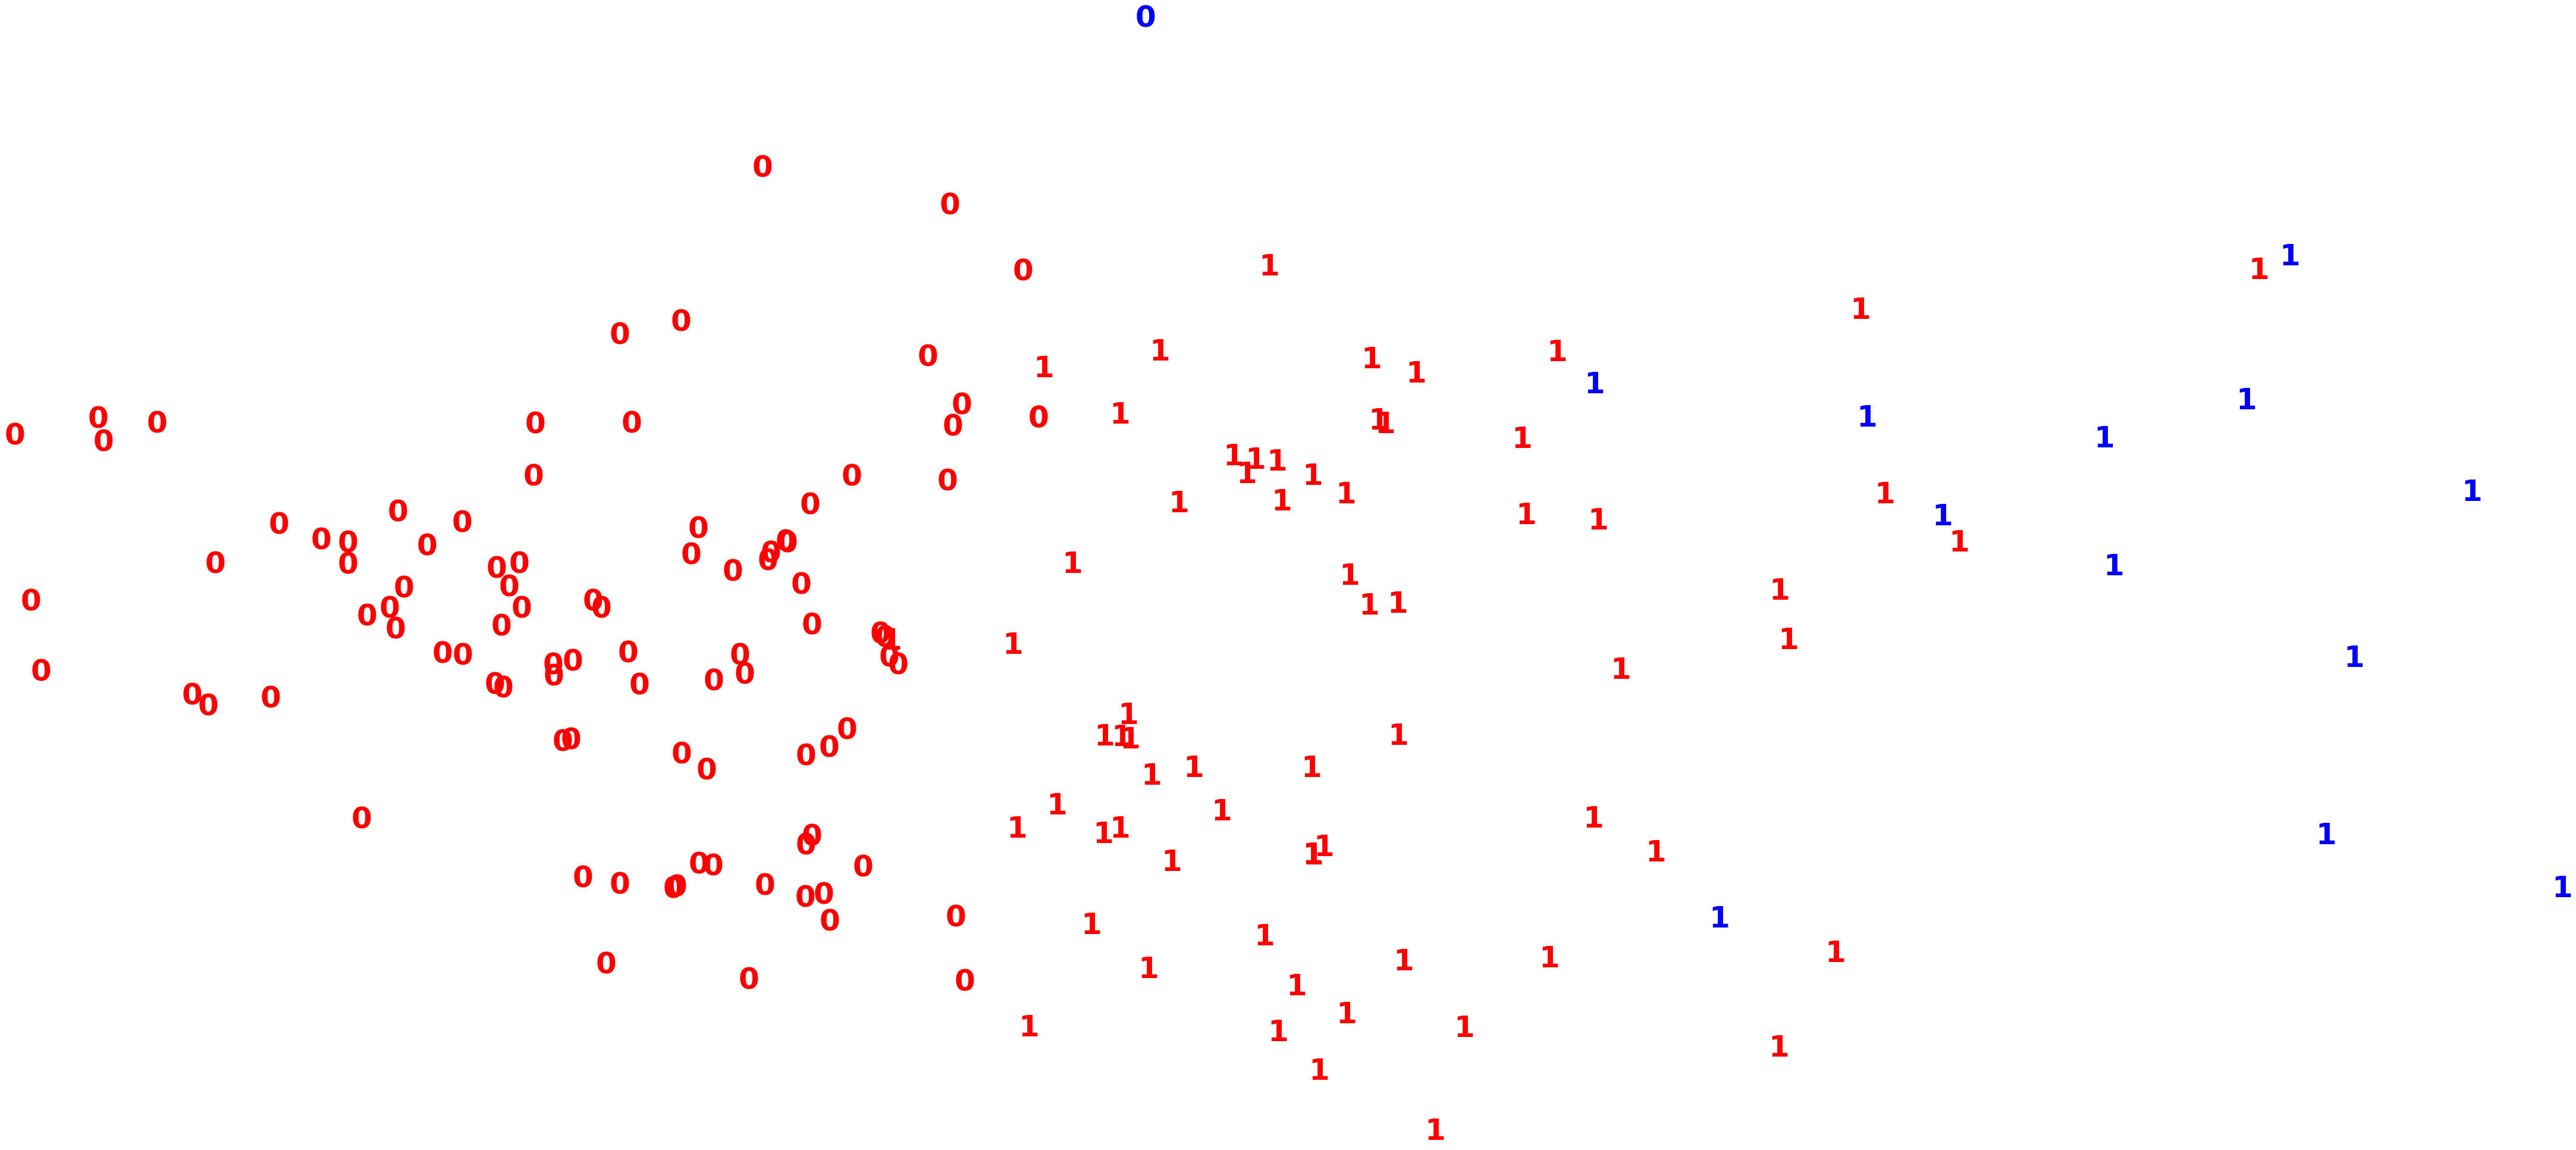

In [21]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(Y_pred[i]),
             color=colours[Y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

2.62 ms ± 66 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


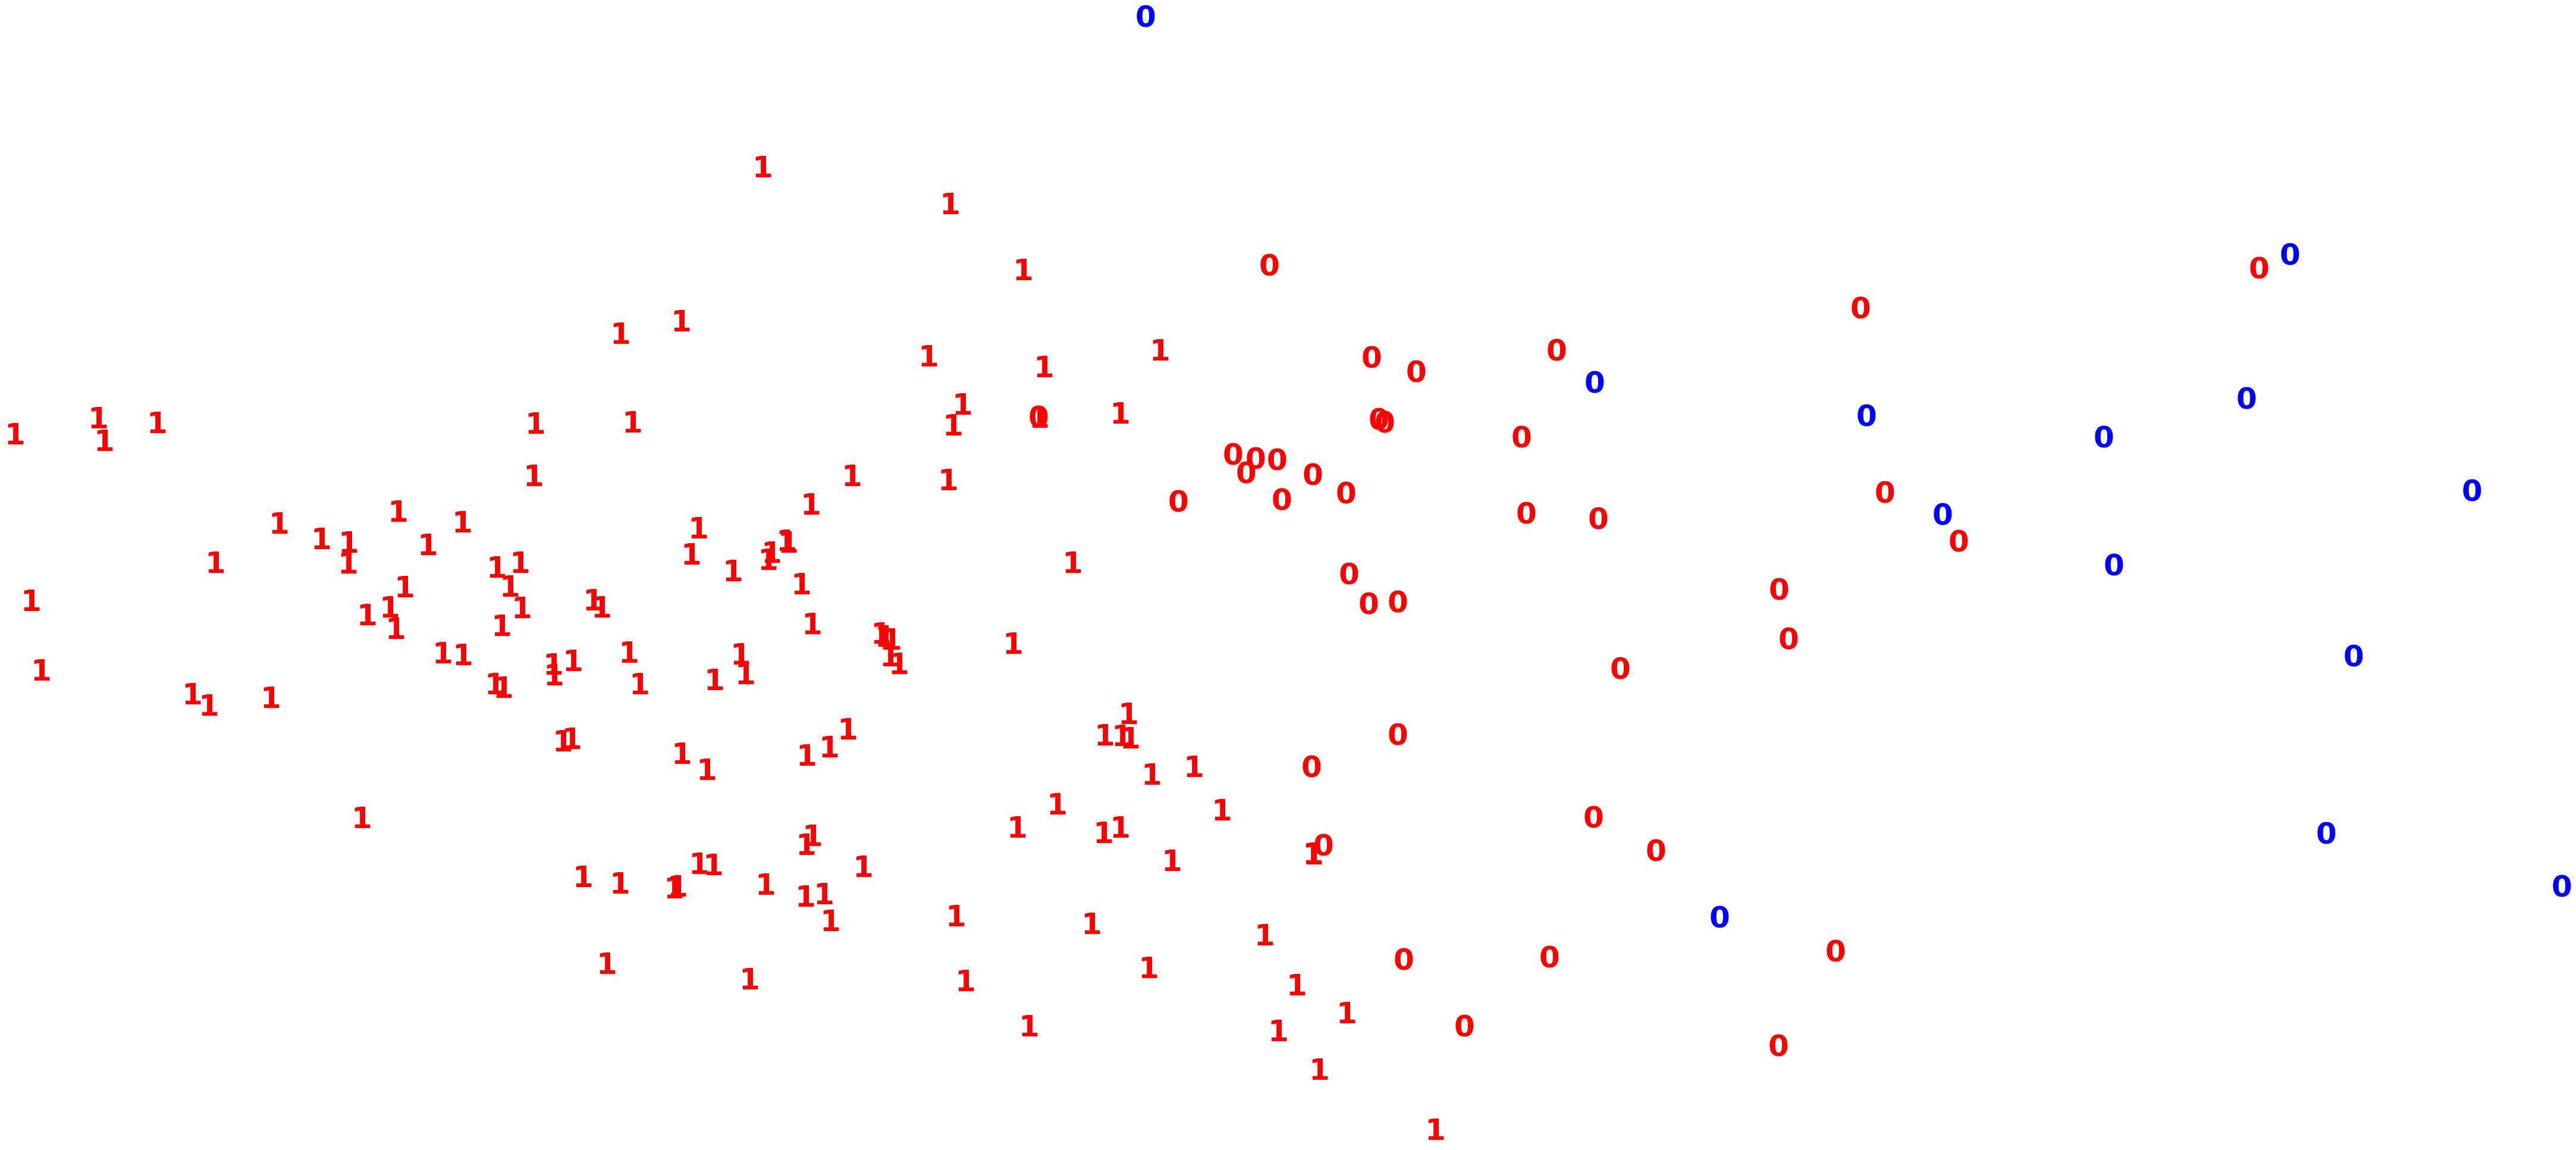

In [23]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
             color=colours[Y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()